**##下載套件##**

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 21.8 MB 267 kB/s
     |████████████████████████████████| 11.1 MB 9.9 MB/s 
     |████████████████████████████████| 596 kB 64.4 MB/s 
     |████████████████████████████████| 102 kB 6.4 MB/s 
     |████████████████████████████████| 690 kB 51.7 MB/s 
     |████████████████████████████████| 4.7 MB 49.1 MB/s 
     |████████████████████████████████| 63 kB 846 kB/s 
     |████████████████████████████████| 812 kB 49.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=5a2fffbde22cac9fed316443704b879a1fc5f1d98fa0dc3d117edc624b20cb4a
  Stored in directory: /tmp/pip-ephem-wheel-cache-aletrs78/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=9cd638422a0115578b4fd8cea3f

**##引入套件##**

In [ ]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
import seaborn as sns
# Google drive utils
import gdown

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data pre=processing
from sklearn.preprocessing import StandardScaler
# data modeling
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, ElasticNet, RidgeClassifier

**##下載資料集##**

In [ ]:
url = "https://drive.google.com/u/0/uc?id=16JBsJNi6u7aGLG7uhb3cOtZKbnYY9Cu7&export=download"
output = "heart.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/u/0/uc?id=16JBsJNi6u7aGLG7uhb3cOtZKbnYY9Cu7&export=download
To: /content/heart.csv
100%|██████████| 11.3k/11.3k [00:00<00:00, 13.5MB/s]


'heart.csv'

**##匯入資料集並顯示前10筆##**

In [ ]:
data = pd.read_csv('./heart.csv')
data.head(10) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**##以target有無得心臟病來預測做畫圖##**

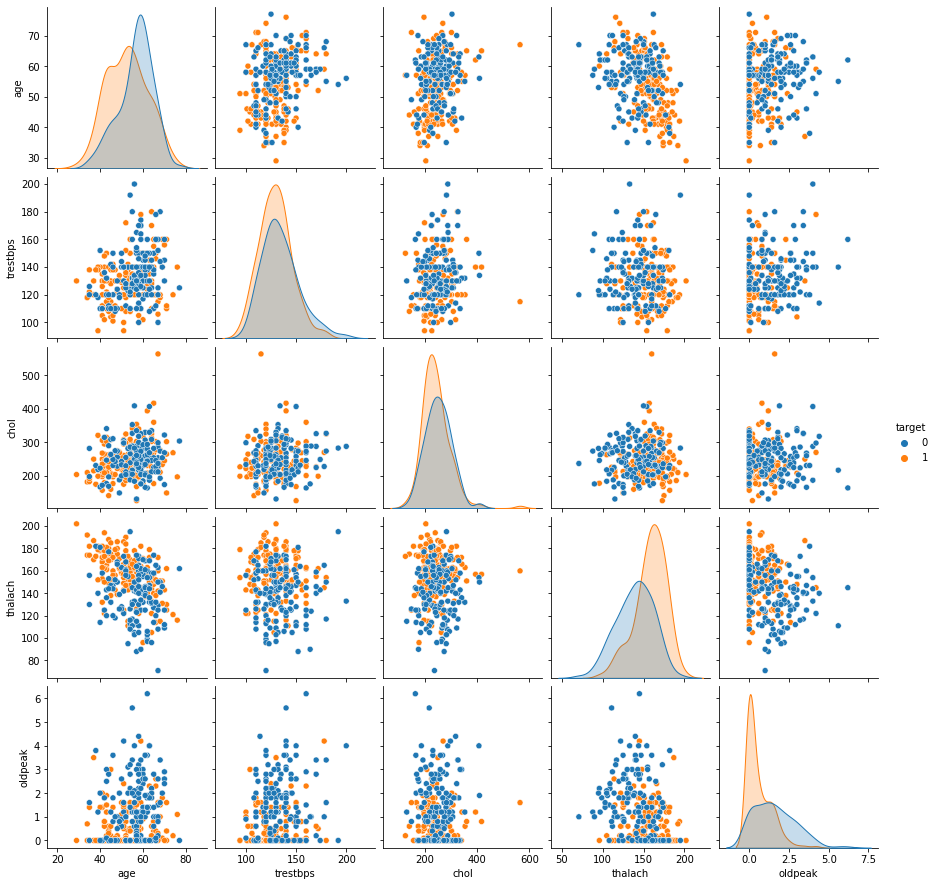

In [ ]:
import seaborn as sns
sns.pairplot(data, hue='target');

**##套件ProfileReport產生的結果可用來快速進行資料探索、產生觀點##**

In [ ]:
profile = pp.ProfileReport(data);
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

## ***資料前處理***

In [ ]:
#移除重複的紀錄
original_dim = data.shape 
data = data.drop_duplicates()
print('原始的資料維度:', original_dim)
print('移除重複資料後的資料維度:', data.shape)

原始的資料維度: (303, 14)
移除重複資料後的資料維度: (302, 14)


### ***欄位與型別轉換***
目前我們的資料集所有欄位都有其預設的資料型態，但是並非都正確。在進入 ML 之前，應先將每一個欄位調整為正確的資料型態。

In [ ]:
#列出所有欄位的資料型態
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#列出實際上是類別的欄位名稱
cate_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
#將每一個屬於類別的欄位型別轉為category
for col in cate_cols:
  data[col] = data[col].astype('category')

seaborn.factorplot() 適用於視覺化類別行變數與目標變數之間的關聯，我們將以sex以及cp,fbs,restecg,exang,slope,ca,thal 八個類別型變數示範，以 seaborn.factorplot 從資料中得到觀點。

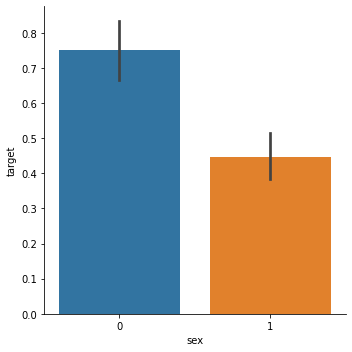

In [ ]:
sns.factorplot(x ='sex', y ='target', data = data, kind='bar');

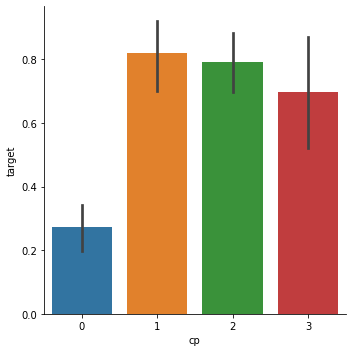

In [ ]:
#繪製
sns.factorplot(x ='cp', y ='target', data = data, kind='bar');

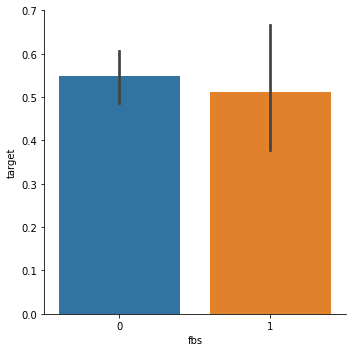

In [ ]:
sns.factorplot(x ='fbs', y ='target', data = data, kind='bar');

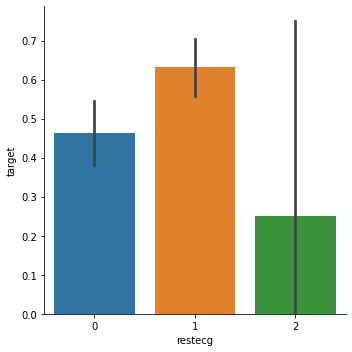

In [ ]:
sns.factorplot(x ='restecg', y ='target', data = data, kind='bar');

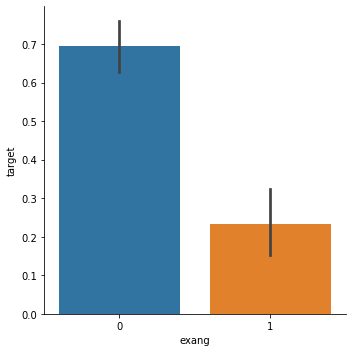

In [ ]:
sns.factorplot(x ='exang', y ='target', data = data, kind='bar');

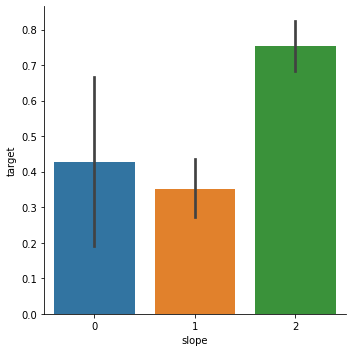

In [ ]:
sns.factorplot(x ='slope', y ='target', data = data, kind='bar');

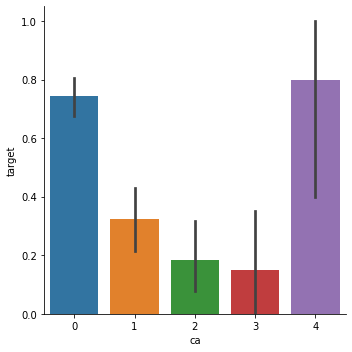

In [ ]:
sns.factorplot(x ='ca', y ='target', data = data, kind='bar');


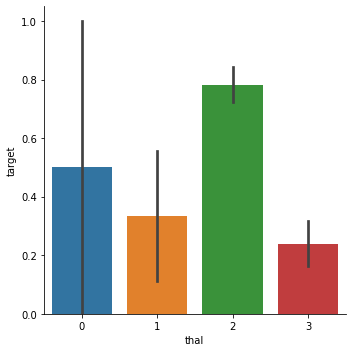

In [ ]:
sns.factorplot(x ='thal', y ='target', data = data, kind='bar');

**##Logic模型訓練##**

In [ ]:
data_X = data.drop('target', axis=1)
X = pd.get_dummies(data_X) #將所有的類別型變數做 one-hot encoding
y = data.target.values
print(X.shape, y.shape)

(303, 13) (303,)


**##訓練模型訓練集和驗證集##**

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.1, random_state=1)
lgs = LogisticRegression()
lgs.fit(train_X, train_y)

LogisticRegression()

**##訓練集測試結果##**

In [ ]:
y_pred = lgs.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.94        17

    accuracy                           0.94        31
   macro avg       0.94      0.94      0.94        31
weighted avg       0.94      0.94      0.94        31



**##混淆矩陣##**

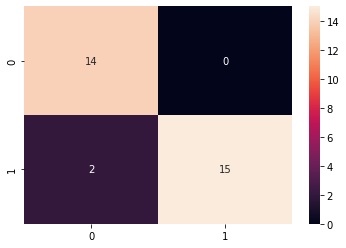

In [ ]:
sns.heatmap(confusion_matrix(test_y, y_pred), annot=True);

**##特徵重要度一覽##**

In [ ]:
importance = lgs.coef_[0]
print(importance)

[ 0.00733191 -1.34990129  0.82772355 -0.01075031 -0.00296977 -0.1666963
  0.4323633   0.02783937 -0.61587158 -0.50826169  0.53984426 -0.67622498
 -0.89381786]


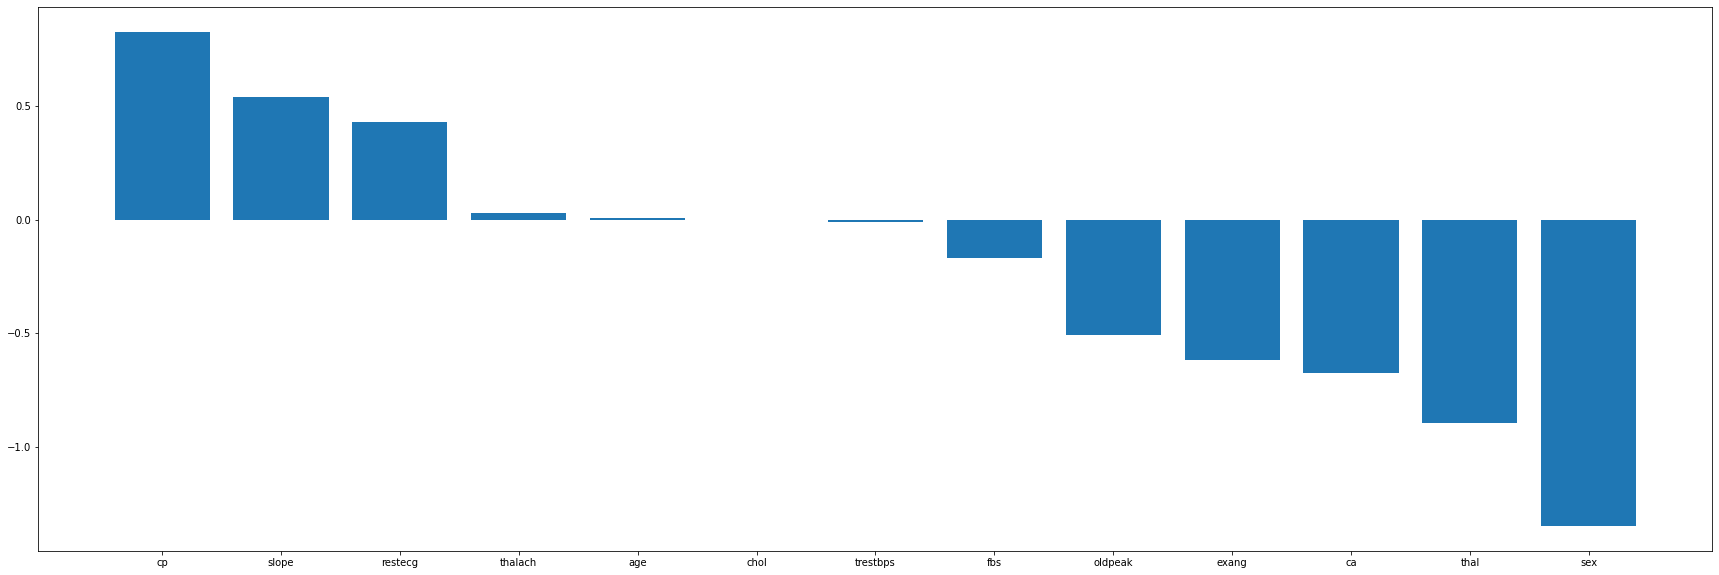

In [ ]:
#以重要度重新排序特徵名稱
sorted_ft_importance = sorted(list(zip(importance, X.columns)), key=lambda ft:ft[0], reverse=True)
# 特徵重要度視覺化
plt.figure(figsize=(30, 10))
plt.bar([ft[1] for ft in sorted_ft_importance], [ft[0] for ft in sorted_ft_importance])
plt.show()